In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [2]:

import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import tensorflow as tf
import tensorflow.keras
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import matplotlib.pyplot as plt
import time

In [3]:
"""train = '/content/drive/MyDrive/Dataset/data1/experiements/dest_folder/train'
#test ='/content/drive/MyDrive/facemaskdetection_using_yolov3 4 5/observations/experiements/dest_folder/test'
test ='/content/drive/MyDrive/Dataset/data1/experiements/dest_folder/test'
valid = '/content/drive/MyDrive/Dataset/data1/experiements/dest_folder/val'"""
#train ="/content/drive/MyDrive/Dataset/data1/experiements/data"
#train ="/content/drive/MyDrive/Dataset/rawdataaug"
train ="/content/drive/MyDrive/Dataset/croped"
#train ="/content/drive/MyDrive/Colab Notebooks/New folder"






In [4]:
img_aug = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
)
train_batch = img_aug.flow_from_directory(train,target_size=(70,70),batch_size=600,class_mode='binary',save_to_dir=train+'/',color_mode='rgb',save_prefix='thesis_aug',save_format='jpg')


#train_batch.next()

Found 1801 images belonging to 2 classes.


In [5]:
def preprocess1(data):
  data_data =[]
  dim = (70,70)
  classes = ['Mask','Non Mask']
  for x in classes:
    path = os.path.join(data,x)
    print(len(os.listdir(path)))
    class_num=classes.index(x)
    for img in os.listdir(path):
      img = os.path.join(path,img)
      imggray = cv2.imread(img,cv2.IMREAD_GRAYSCALE)    
      img = cv2.resize(imggray,dim)
      img = img/255.0
      data_data.append([img,class_num])
  return data_data


In [6]:
train_data = preprocess1(train)
#test_data = preprocess1(test)
#valid_data = preprocess1(valid)

1118
683


In [7]:
import numpy as np
def preprocess2(data):
  train=[]
  lbl=[]
  for xx,yy in data:
    train.append(xx)
    lbl.append(yy)
  img = np.array(train).reshape(-1,70,70,1)
  img = img/255.0
  lbl = np.array(lbl).reshape(-1,1)
  return img,lbl

trainimg,trainlbl = preprocess2(train_data)
#testimg,testlbl = preprocess2(test_data)
#validimg,validlbl  = preprocess2(valid_data)

In [8]:

print(len(trainimg),len(trainlbl))

1801 1801


In [9]:
trainimg,testimg, trainlbl, testlbl = train_test_split(trainimg,trainlbl,test_size=.2)

In [10]:
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import Flatten,Dense,Dropout
from keras.layers import UpSampling2D,Activation,LeakyReLU,MaxPooling2D,Normalization
from keras.layers.merge import add, concatenate
from keras.models import Model,Sequential,load_model

model= Sequential()
model.add(Conv2D(64,(3,3),input_shape = (70,70,1)))
model.add(LeakyReLU())   
model.add(Normalization())

model.add(Conv2D(32,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
model.add(BatchNormalization())
  

model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
model.add(BatchNormalization())
  

#Layer5-8 starts

model.add(Conv2D(128,kernel_size=(3,3),strides=(2,2),padding='same' ))
model.add(LeakyReLU()) 
  
model.add(BatchNormalization())


model.add(Conv2D(64,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU()) 
  
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())#end

#layer 9-11 starts
model.add(Conv2D(64,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())#end

#layer 16-36
for i in range(7):
  model.add(Conv2D(64,kernel_size=(1,1),strides=(1,1),padding='same' ))
  model.add(LeakyReLU())  
    
  model.add(BatchNormalization())

  model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same' ))
  model.add(LeakyReLU())  
    
  model.add(BatchNormalization())
model.add(MaxPooling2D())

#layer 37-40

model.add(Conv2D(512,kernel_size=(3,3),strides=(2,2),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())
 #end

  #layer 41-61
 
for i in range(7):
  model.add(Conv2D(256,kernel_size=(1,1),strides=(1,1),padding='same' ))
  model.add(LeakyReLU()) 
    
  model.add(BatchNormalization())

  model.add(Conv2D(512,kernel_size=(3,3),strides=(1,1),padding='same' ))
  model.add(LeakyReLU()) 
    
  model.add(BatchNormalization())
model.add(MaxPooling2D())#end
  #layer 62-65

model.add(Conv2D(1024,kernel_size=(3,3),strides=(2,2),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(1024,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())#end

#layer 66-74

for i in range(3):
  model.add(Conv2D(512,kernel_size=(1,1),strides=(1,1),padding='same' ))
  model.add(LeakyReLU())  
    
  model.add(BatchNormalization())

  model.add(Conv2D(1024,kernel_size=(3,3),strides=(1,1),padding='same' ))
  model.add(LeakyReLU())  
    
  model.add(BatchNormalization()) #end

#layer 75-79


model.add(Conv2D(1024,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())#end

#layer 80-82
model.add(Conv2D(1024,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='same',use_bias=True))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())#end


model.add(Conv2D(256,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())    
model.add(BatchNormalization())
model.add(UpSampling2D(2))#end


model.add(Conv2D(256,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Conv2D(512,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())
model.add(UpSampling2D(2))

model.add(Conv2D(512,kernel_size=(3,3),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size=(1,1),strides=(1,1),padding='same' ))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())#end

model.add(Flatten())#..................

model.add(Dense(64))
model.add(LeakyReLU())  
  
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))





In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(trainimg,trainlbl,validation_split=.1,epochs=30,batch_size=32)

Epoch 1/30
41/41 [==============================] - 20s 486ms/step - loss: 0.1262 - accuracy: 0.9630 - val_loss: 0.6742 - val_accuracy: 0.5972
Epoch 2/30
41/41 [==============================] - 17s 410ms/step - loss: 0.0685 - accuracy: 0.9738 - val_loss: 0.6999 - val_accuracy: 0.5972
Epoch 3/30
41/41 [==============================] - 17s 409ms/step - loss: 0.0659 - accuracy: 0.9730 - val_loss: 0.7160 - val_accuracy: 0.5972
Epoch 4/30
41/41 [==============================] - 17s 410ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.7314 - val_accuracy: 0.5972
Epoch 5/30
41/41 [==============================] - 17s 411ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.7740 - val_accuracy: 0.5972
Epoch 6/30
41/41 [==============================] - 17s 410ms/step - loss: 0.0602 - accuracy: 0.9830 - val_loss: 0.7793 - val_accuracy: 0.5972
Epoch 7/30
41/41 [==============================] - 17s 410ms/step - loss: 0.0395 - accuracy: 0.9861 - val_loss: 0.9465 - val_accuracy: 0.4028

In [ ]:
model.summary()

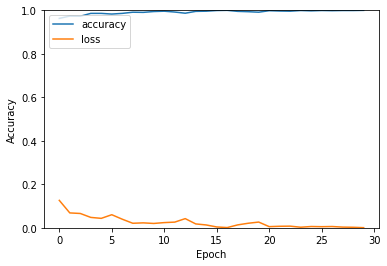

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left')

In [15]:
pred = model.predict(trainimg)


In [16]:
for i in range(len(pred)):
  if pred[i]>.5:
    pred[i]=1
  else:
    pred[i]=0


              precision    recall  f1-score   support

        Mask       1.00      1.00      1.00       897
    Non Mask       1.00      1.00      1.00       543

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



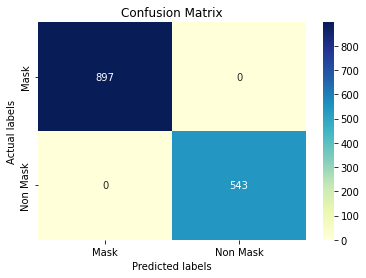

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
cm = confusion_matrix(trainlbl,pred)
cm

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax,cmap="YlGnBu",fmt='d');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Mask', 'Non Mask']); 
ax.yaxis.set_ticklabels(['Mask', 'Non Mask']);
target= ['Mask', 'Non Mask']
report = classification_report(trainlbl,pred,target_names = target)
print(report)

#plot_confusion_matrix(model,test,label)

In [22]:
#model.save(train+'/model.h5')

In [18]:
def errors(data2,name,value):
  path = os.path.join(data2,name)
  ind = value
  list_img_lbl = []
  for im in os.listdir(path):
    img = os.path.join(path,im)
    imgray = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(imgray,(70,70))
    img=img/255.0
    list_img_lbl.append([img,ind])


  image2, label2 = preprocess2(list_img_lbl)
  pred2 = model.predict(image2)
  for i in range(len(pred2)):
    if pred2[i]>.5:
      pred2[i]=1
    else:
      pred2[i]=0
  pred = model.predict(image2)
  li =[]

  for i in range(len(pred2)):
    if label2[i]!= pred2[i] and label2[i]==value:
    
      li.append(i)
  print(len(li))
  images = []
  for img in range(len(os.listdir(os.path.join(data2,name)))):
    #print(img)
    for i in li:
      if i == img:
        images.append(data2+'/'+name+'/'+(os.listdir(os.path.join(data2,name))[img]))
        #print(pred[i])
  return images

In [19]:
imlist = errors(train,'Mask',0)

0


In [20]:
import matplotlib.image as img
plt.figure(figsize=(20,20))
for i in range(len(imlist)):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ima = img.imread(imlist[i])
    plt.imshow(ima)
    plt.xlabel('Non Mask')
plt.show()

<Figure size 1440x1440 with 0 Axes>

In [21]:
imlist =errors(train,'Non Mask',1)


2


In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(imlist)):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ima = img.imread(imlist[i])
    plt.imshow(ima)
    plt.xlabel('Mask')
plt.show()

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 500, 500);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 500; //video.videoWidth;
      captureCanvas.height = 500; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/shape_predictor_81_face_landmarks.dat')

In [ ]:
# start streaming video from webcam
from math import hypot
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
corona = cv2.imread('/content/drive/MyDrive/Colab Notebooks/count-corona.png',cv2.IMREAD_UNCHANGED)
model = load_model('/content/drive/MyDrive/Dataset/pics/model.h5')
from IPython.display import Image, display
display(Image(corona))
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    
    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    frame = img
    # create transparent overlay for bounding box
    bbox_array = np.zeros([500,500,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = detector(img)
    # get face region coordinates
    # get face bounding box for overlay
    bbox_array = cv2.putText(bbox_array,'Masked ', (50,50), cv2.FONT_HERSHEY_SIMPLEX, .5, (255, 255, 255), 1, cv2.LINE_AA)    
  
    for face in faces:

      landmarks = predictor(gray,face)
      topnose = (landmarks.part(30).x-70,landmarks.part(30).y)
      #cv2.circle(bbox_array,topnose,3,(255,0,0),-1)
      zero= (landmarks.part(0).x+10,landmarks.part(0).y)
      seveneight = (landmarks.part(78).x+10,landmarks.part(78).y)
      eight = (landmarks.part(8).x+10,landmarks.part(8).y)
      sevenone =(landmarks.part(71).x+10,landmarks.part(71).y)
      #cv2.circle(bbox_array,zero,3,(255,0,0),-1)
      #cv2.circle(bbox_array,sevenone,3,(255,0,0),-1)
      width=int(hypot(zero[0]-seveneight[0],zero[1]-seveneight[1]))
      length=int(hypot(eight[0]-sevenone[0],eight[1]-sevenone[1]))
      #print(width,length)
      array = bbox_array
      coronagray = cv2.cvtColor(corona,cv2.COLOR_BGR2GRAY)
      frame = cv2.cvtColor(frame,cv2.COLOR_RGB2RGBA)
      topy = (sevenone[0]-int(width/2),sevenone[1])
      area = frame[topy[1]:topy[1]+length,topy[0]:topy[0]+width]
      _,bin = cv2.threshold(coronagray,25,255,cv2.THRESH_BINARY_INV)
      #print(area[0],area[1])
      
      #bin = cv2.UMat(bin)
      x = area.shape
      #area = cv2.UMat(area)
      area = cv2.bitwise_and(area,area,bin)
     # corona = cv2.UMat(corona)
      corona = cv2.cvtColor(corona, cv2.COLOR_RGB2RGBA)
      corona = cv2.resize(corona,(area.shape[1],area.shape[0]))
      area  = area+corona
      topleft = area.shape
     
     # print(frame.shape,area.shape)
      #top =(landmarks.part(76).x-68,landmarks.part(76).y)
      #topx = (zero[0],zero[1]-int(length/2))
      forpredict = img[topy[1]:topy[1]+length,topy[0]:topy[0]+width]
      forpredict = cv2.resize(forpredict,(70,70))
      forpredict = cv2.cvtColor(forpredict,cv2.COLOR_RGB2GRAY)
      forpredict = np.array(forpredict).reshape(-1,70,70,1)
      forpredict = forpredict/255.0
      pred =0 
      pred = model.predict(forpredict)
      pred = np.argmax(pred)
      if(int((1-pred)*100) > 90):
        bbox_array = cv2.putText(bbox_array,'Non masked '+str(int((1-pred)*100))+'%', (50,50), cv2.FONT_HERSHEY_SIMPLEX, .7, (250,250 , 250), 3, cv2.LINE_AA)    
        bbox_array[topy[1]:topy[1]+length,topy[0]:topy[0]+width] = area
        bbox_array = cv2.rectangle(bbox_array,(topy[0],topy[1]),(topy[0]+width,topy[1]+length),(0,255,0),2)
        
        

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes